In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input
from tensorflow.keras.applications.inception_v3 import preprocess_input as inceptionnet_preprocess_input
from sklearn.model_selection import train_test_split

def load_and_preprocess_images(folder_path, label, target_size=(224, 224), model_name='mobilenet'):
    images = []
    labels = []
    preprocess_input = mobilenet_preprocess_input if model_name == 'mobilenet' else inceptionnet_preprocess_input
    for filename in os.listdir(folder_path):
        img = load_img(os.path.join(folder_path, filename), target_size=target_size)
        img_array = img_to_array(img)
        img_array = preprocess_input(img_array) 
        images.append(img_array)
        labels.append(label)

    return np.array(images), np.array(labels)

healthy_dir = 'Healthy'
unhealthy_dir = 'Unhealthy'

healthy_images, healthy_labels = load_and_preprocess_images(healthy_dir, 1)
unhealthy_images, unhealthy_labels = load_and_preprocess_images(unhealthy_dir, 0)

X = np.concatenate((healthy_images, unhealthy_images), axis=0)
y = np.concatenate((healthy_labels, unhealthy_labels), axis=0)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

num_classes = 2

mobilenet = tf.keras.applications.MobileNet(weights='imagenet', include_top=False)
inceptionnet = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False)

for layer in mobilenet.layers:
    layer.trainable = False
for layer in inceptionnet.layers:
    layer.trainable = False

combined_output = tf.keras.layers.Concatenate()([tf.keras.layers.GlobalAveragePooling2D()(mobilenet.output),
                                                 tf.keras.layers.GlobalAveragePooling2D()(inceptionnet.output)])

x = tf.keras.layers.Dense(1024, activation='relu')(combined_output)
output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.models.Model(inputs=[mobilenet.input, inceptionnet.input], outputs=output)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit([X_train, X_train], y_train, validation_data=([X_val, X_val], y_val), epochs=10, batch_size=32)

performance = model.evaluate([X_test, X_test], y_test)

model.save('my_hybrid_model_updated.h5')






Epoch 1/10


22/22 [==============================] - 109s 3s/step - loss: 2.1912 - accuracy: 0.6585 - val_loss: 0.2785 - val_accuracy: 0.8837
Epoch 2/10
22/22 [==============================] - 60s 3s/step - loss: 0.2123 - accuracy: 0.9132 - val_loss: 0.1071 - val_accuracy: 0.9535
Epoch 3/10
22/22 [==============================] - 72s 3s/step - loss: 0.0832 - accuracy: 0.9797 - val_loss: 0.0739 - val_accuracy: 0.9767
Epoch 4/10
22/22 [==============================] - 63s 3s/step - loss: 0.0525 - accuracy: 0.9899 - val_loss: 0.0708 - val_accuracy: 0.9535
Epoch 5/10
22/22 [==============================] - 70s 3s/step - loss: 0.0351 - accuracy: 0.9986 - val_loss: 0.0511 - val_accuracy: 0.9767
Epoch 6/10
22/22 [==============================] - 74s 3s/step - loss: 0.0221 - accuracy: 0.9971 - val_loss: 0.0506 - val_accuracy: 0.9767
Epoch 7/10
22/22 [==============================] - 68s 3s/step - loss: 0.0145 - accuracy: 0.9986 - val_loss: 0.0549 - val_accuracy: 0.9884
Epoch 8/10
22

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 19s 2s/step - loss: 0.1189 - accuracy: 0.9770
Accuracy on testing data: 0.977011501789093
3/3 [==============================] - 19s 2s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

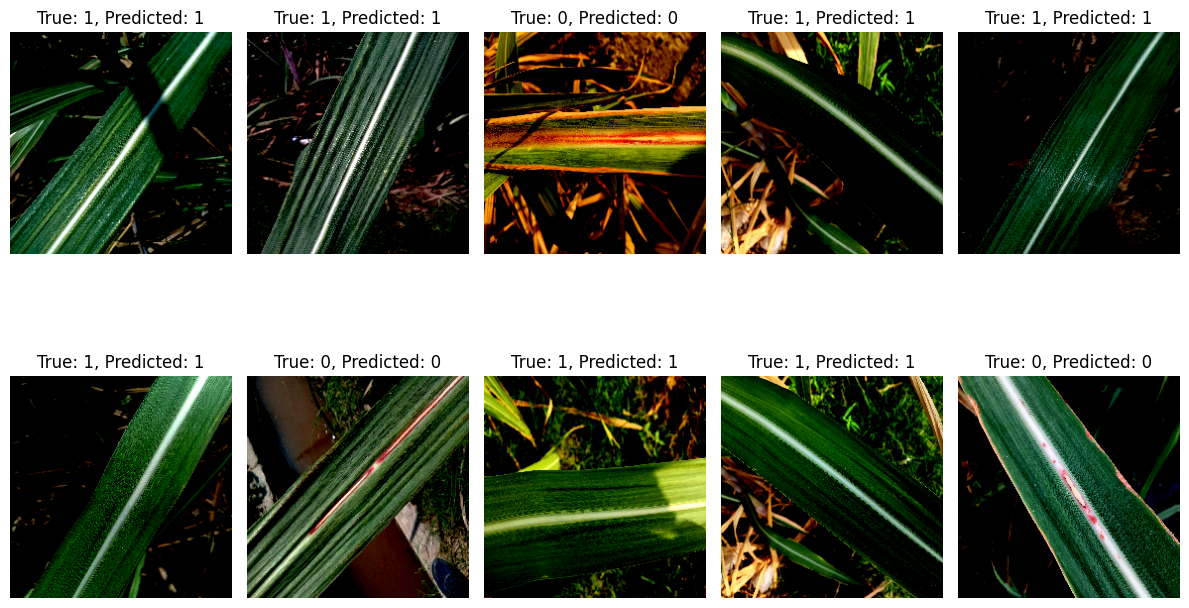

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input
from tensorflow.keras.applications.inception_v3 import preprocess_input as inceptionnet_preprocess_input
from sklearn.model_selection import train_test_split

def load_and_preprocess_images(folder_path, label, target_size=(224, 224), model_name='mobilenet'):
    images = []
    labels = []
    preprocess_input = mobilenet_preprocess_input if model_name == 'mobilenet' else inceptionnet_preprocess_input
    for filename in os.listdir(folder_path):
        img = load_img(os.path.join(folder_path, filename), target_size=target_size)
        img_array = img_to_array(img)
        img_array = preprocess_input(img_array) 
        images.append(img_array)
        labels.append(label)

    return np.array(images), np.array(labels)

healthy_dir = 'Healthy'
unhealthy_dir = 'Unhealthy'

healthy_images, healthy_labels = load_and_preprocess_images(healthy_dir, 1)
unhealthy_images, unhealthy_labels = load_and_preprocess_images(unhealthy_dir, 0)

X = np.concatenate((healthy_images, unhealthy_images), axis=0)
y = np.concatenate((healthy_labels, unhealthy_labels), axis=0)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

saved_model_path = 'my_hybrid_model_updated.h5'
saved_model = tf.keras.models.load_model(saved_model_path)

loss, accuracy = saved_model.evaluate([X_test, X_test], y_test)

print("Accuracy on testing data:", accuracy)

predictions = saved_model.predict([X_test, X_test])
predicted_labels = np.argmax(predictions, axis=1)

num_examples = 10
indices = np.random.choice(range(len(X_test)), num_examples, replace=False)

plt.figure(figsize=(12, 8))
for i, index in enumerate(indices, 1):
    plt.subplot(2, 5, i)
    plt.imshow(X_test[index])
    plt.title(f"True: {y_test[index]}, Predicted: {predicted_labels[index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
